<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [21]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install numpy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [34]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


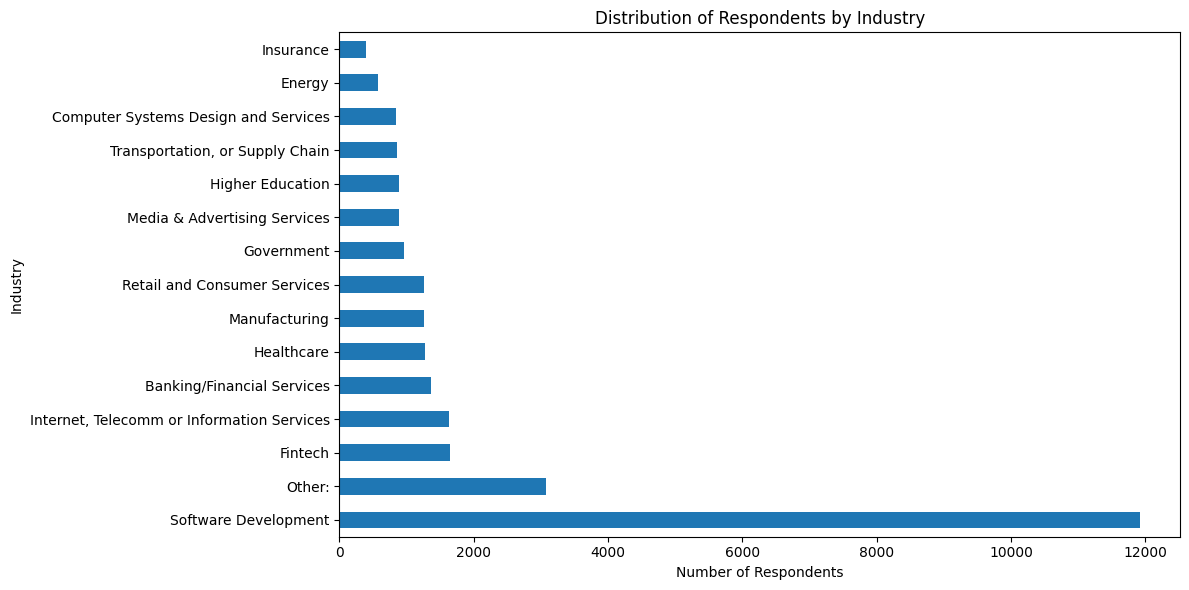

In [3]:
##Write your code here

industry_count = df['Industry'].value_counts().sort_values(ascending = False)

industry_count.plot(kind='barh', figsize=(12, 6))
plt.title('Distribution of Respondents by Industry')
plt.xlabel('Number of Respondents')
plt.ylabel('Industry')

plt.tight_layout()

plt.show()


<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [5]:
##Write your code here

# Drop missing values in compensation column
comp_clean = df['ConvertedCompYearly'].dropna()

comp_mean = comp_clean.mean()
comp_median = comp_clean.median()
comp_std = comp_clean.std()

#Display mean, median and mode
print(comp_mean)
print(comp_median)
print(comp_std)

#Define Outlier Threshold (3 Standard Deviations Above Mean)
threshold_comp = comp_mean + 3 * comp_std

#Identify high compensation outliers
high_comp_outliers = df[df['ConvertedCompYearly'] > threshold_comp]

high_comp_outliers[['ConvertedCompYearly']].sort_values(
    by='ConvertedCompYearly', ascending=False
).head()

86155.28726264134
65000.0
186756.97308629754


,ConvertedCompYearly
15837,16256603.0
12723,13818022.0
28379,9000000.0
17593,6340564.0
17672,4936778.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


The IQR is:  75259.5
Lower bound:  -80177.25
Upper bound:  220860.75
Number of outliers:  978


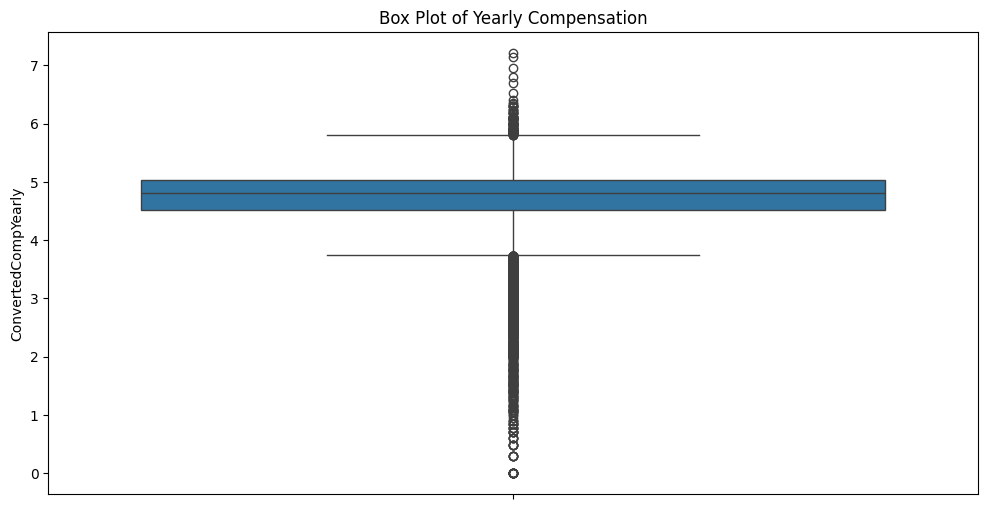

In [22]:
##Write your code here

#Calculate Quartiles and IQR
Q1 = comp_clean.quantile(0.25)
Q3 = comp_clean.quantile(0.75)
IQR = Q3 - Q1
#Display IQR
print('The IQR is: ', IQR)

#Determine Lower and Upper Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Display bounds
print('Lower bound: ', lower_bound)
print('Upper bound: ', upper_bound)

#Identify and Count Outliers
outliers = comp_clean[(comp_clean < lower_bound) | (comp_clean > upper_bound)]

# Number of outliers
outliers_count = outliers.count()
print('Number of outliers: ', outliers_count)


plt.figure(figsize=(12,6))
sns.boxplot(y=np.log10(comp_clean))
plt.title('Box Plot of Yearly Compensation')
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [24]:
##Write your code here

#Create a New DataFrame Without Outliers
df_no_outliers = df[
    (df['ConvertedCompYearly'] >= lower_bound) &
    (df['ConvertedCompYearly'] <= upper_bound)
]

print('Original DataFrame shape: ', df.shape)
print('New DataFrame shape: ', df_no_outliers.shape)
print('Removed rows: ', df.shape[0] - df_no_outliers.shape[0])

Original DataFrame shape:  (65437, 114)
New DataFrame shape:  (22457, 114)
Removed rows:  42980


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


Old data frame shape:  65437
Missing values:  Age                    0
ConvertedCompYearly    0
YearsCodePro           0
dtype: int64
Missing values after cleaning:  23345
rows with both: (23345, 2)
Age_numeric NaNs: 0
YearsCodePro NaNs: 0
                     Age_numeric  ConvertedCompYearly  YearsCodePro
Age_numeric             1.000000             0.120909      0.827548
ConvertedCompYearly     0.120909             1.000000      0.140893
YearsCodePro            0.827548             0.140893      1.000000


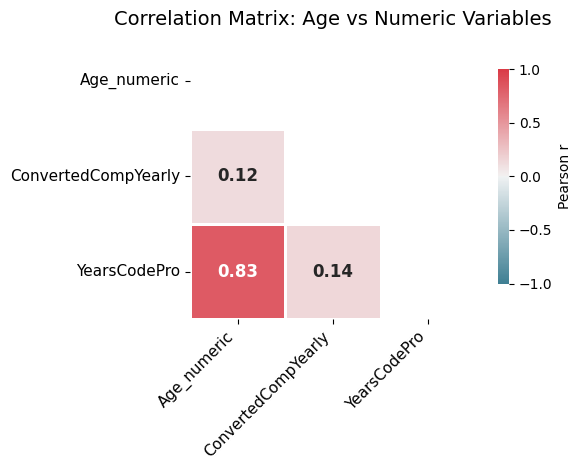

In [59]:
##Write your code here

#Create new DataFrame for Correlation Analysis
df_corr_analysis = df[['Age','ConvertedCompYearly','YearsCodePro']].dropna()
print('Old data frame shape: ', df.shape[0])
print('Missing values: ', df_corr_analysis.isna().sum())
print('Missing values after cleaning: ', df_corr_analysis.shape[0])
print('===============================')
print("rows with both:", df_corr_analysis[['Age','YearsCodePro']].dropna().shape)
print("Age_numeric NaNs:", df_corr_analysis['Age'].isna().sum())
print("YearsCodePro NaNs:", df_corr_analysis['YearsCodePro'].isna().sum())
print('===============================')
#Map Age Ranges to Numeric Values
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}
df_corr_analysis['Age_numeric'] = df_corr_analysis['Age'].map(age_mapping)

#Map YearsCodePro using replace
df_corr_analysis.loc[:, 'YearsCodePro'] = df_corr_analysis.loc[:, 'YearsCodePro'].replace(
    {'Less than 1 year': 0.5, 'More than 50 years': 50}
)
df_corr_analysis.loc[:, 'YearsCodePro'] = pd.to_numeric(df_corr_analysis.loc[:, 'YearsCodePro'], errors = 'coerce')

#You Can Safely Compute Correlation
corr_matrix = df_corr_analysis[['Age_numeric', 'ConvertedCompYearly', 'YearsCodePro']].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
print(corr_matrix)

cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Visualize the Correlation Matrix
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap=cmap,
    vmin=-1, vmax=1,
    center=0,
    annot=True,
    fmt='.2f',
    annot_kws={"size":12, "weight":"bold"},
    linewidths=0.8,
    linecolor='white',
    cbar_kws={"shrink":0.75, "label":"Pearson r"},
    square=True
)

plt.title('Correlation Matrix: Age vs Numeric Variables', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.savefig('corr_heatmap.png', dpi=200, bbox_inches='tight')
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
